In [2]:
from datascience import *
import numpy as np
import math
%matplotlib inline

In [3]:
UCB_data = Table.read_table('data/UCOP.csv')
rd = UCB_data.select(2,3,4,5).sort(3, descending=True)
professors = rd.where("Title", are.equal_to("PROF-AY"))

In [14]:
UCB_data

Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
2015,Berkeley,BARIKA,BURTON,ACAD ACHIEVEMENT CNSLR 2,54861,52541,0,2320
2015,Berkeley,MAYRA,GONZALEZ,ACAD ACHIEVEMENT CNSLR 2,51624,51624,0,0
2015,Berkeley,DIANA,FLORES,ACAD ACHIEVEMENT CNSLR 2,48880,47593,787,500
2015,Berkeley,KATHERINE,CASTRO,ACAD ACHIEVEMENT CNSLR 2,48646,48371,275,0
2015,Berkeley,LILIANA,IGLESIAS,ACAD ACHIEVEMENT CNSLR 2,47080,47080,0,0
2015,Berkeley,BRIANA,STARKS,ACAD ACHIEVEMENT CNSLR 2,41739,41739,0,0
2015,Berkeley,TOMIE,LENEAR II,ACAD ACHIEVEMENT CNSLR 2,28980,28980,0,0
2015,Berkeley,STEVEN,NGUYEN,ACAD ACHIEVEMENT CNSLR 2,24312,24312,0,0
2015,Berkeley,STEVEN,CZIFRA,ACAD ACHIEVEMENT CNSLR 2,16560,16560,0,0
2015,Berkeley,MINDA,MURPHY,ACAD ACHIEVEMENT CNSLR 2,9046,4906,0,4140


In [4]:
professors.show(20)

First Name,Last Name,Title,Gross Pay
STEPHEN,SHORTELL,PROF-AY,465004
ROBERT,BIRGENEAU,PROF-AY,451845
BIN,YU,PROF-AY,382058
OMAR,YAGHI,PROF-AY,368771
MARK,D'ESPOSITO,PROF-AY,363704
JOHN,HARTWIG,PROF-AY,354461
JASJEET,SEKHON,PROF-AY,344879
TROND,PETERSEN,PROF-AY,337817
ALEXANDER,PINES,PROF-AY,327886
SAUL,PERLMUTTER,PROF-AY,327861


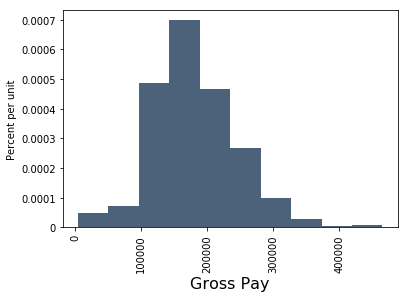

In [5]:
professors.select(3).hist()

### Lecturers with Job Security

In [6]:
rd.where(0, are.containing("PROF"))
rd.where(2, are.containing("LECT")).where(1, "HILFINGER")

First Name,Last Name,Title,Gross Pay
PAUL,HILFINGER,SR LECT SOE-AY,125772


This is where all the stuff for different  job codes is. Hilfinger is apparently not a professor but a lectuerer with job security. http://ucop.edu/academic-personnel-programs/_files/acad-title-codes/academic-ttles-sorted-title-name.pdf

In [7]:
# SR LECT SOE-AY
rd.where(2, "SR LECT SOE-AY")

First Name,Last Name,Title,Gross Pay
DANIEL,GARCIA,SR LECT SOE-AY,172832
SARA,BECKMAN,SR LECT SOE-AY,166033
JOAN,BIEDER,SR LECT SOE-AY,137744
DAVID,PRESTI,SR LECT SOE-AY,136479
PAUL,HILFINGER,SR LECT SOE-AY,125772
BABAK,AYAZIFAR,SR LECT SOE-AY,120325
ROBERT,CALO,SR LECT SOE-AY,120325
VIKRAM,CHANDRA,SR LECT SOE-AY,118220
ANINDITA,ADHIKARI,SR LECT SOE-AY,107345
PAUL,GRABOWICZ,SR LECT SOE-AY,85410


### Lecturers on track to job security

In [8]:
rd.where(1, "DENERO")

First Name,Last Name,Title,Gross Pay
JOHN,DENERO,LECT PSOE-AY-100%,140449


In [9]:
rd.where(2, are.containing("PSOE"))

First Name,Last Name,Title,Gross Pay
JOHN,DENERO,LECT PSOE-AY-100%,140449
JOSHUA,HUG,LECT PSOE-AY-100%,99909
MATTHEW,HOUGH,LECT PSOE-AY-100%,29730


Try finding Professor Balmer using .where and replace 'a' and 'b' in the paranthesis:

In [10]:
#Modify this code by replacing a and b
rd.where(a, b)

First Name,Last Name,Title,Gross Pay
RICHARD,BAMLER,ASST PROF-AY,196836


Display Assistant Professors, "ASST PROF-AY", but only the first 10 rows of the table. 



Modify the code below:

In [1]:
#Modify the code by replacing a, b, c
rd.where(a, b).show(c)

NameError: name 'rd' is not defined

Find the Adjunct professors, "ADJ PROF-AY" using the code below:

In [12]:
#Modify the code by replacing a, b
rd.where(a, b)

First Name,Last Name,Title,Gross Pay
LAUREL,FLETCHER,ADJ PROF-AY,242519
ELISABETH,SEMEL,ADJ PROF-AY,237492
DAVID,OPPENHEIMER,ADJ PROF-AY,235384
JEFFREY,SELBIN,ADJ PROF-AY,232283
CAROL,GALANTE,ADJ PROF-AY,204533
ELLEN,EISEN,ADJ PROF-AY,187962
ERIC,STOVER,ADJ PROF-AY,183117
ANNE,BARANGER,ADJ PROF-AY,164909
MARY,FRAMPTON,ADJ PROF-AY,161301
JENNIFER,GRANHOLM,ADJ PROF-AY,156288


### Comparing the ratios of men to women in highest paying positions by title


In [13]:
titles = make_array("PROF-AY", "ASST PROF-AY", "SR LECT SOE-AY", "LECT PSOE-AY-100%", "ADJ PROF-AY")
ratios = make_array(1, 1, .7, 1, .3)
stats = Table().with_columns(
                "Title", titles,
                "Ratio", ratios
                            )
stats

Title,Ratio
PROF-AY,1
ASST PROF-AY,1
SR LECT SOE-AY,0.7
LECT PSOE-AY-100%,1
ADJ PROF-AY,0.3


Conclusions based on this data:
Definitely seems like some departments have an unbalanced proportion of men to women in highest paying positions. There are some notable outliers in that higher paid Adjunct Professors tend to be women. WIll organize this further and add more in depth analysis.